In [1]:
# pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# this data is related to stock market of tesla
tesla=pdr.get_data_yahoo('TSLA')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-15,75.092003,73.297997,74.500000,75.068001,52132500.0,75.068001
2017-06-16,75.601997,74.019997,75.596001,74.279999,33655000.0,74.279999
2017-06-19,75.339996,73.559998,75.000000,73.959999,32746500.0,73.959999
2017-06-20,75.776001,73.945999,75.334000,74.447998,37193500.0,74.447998
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999


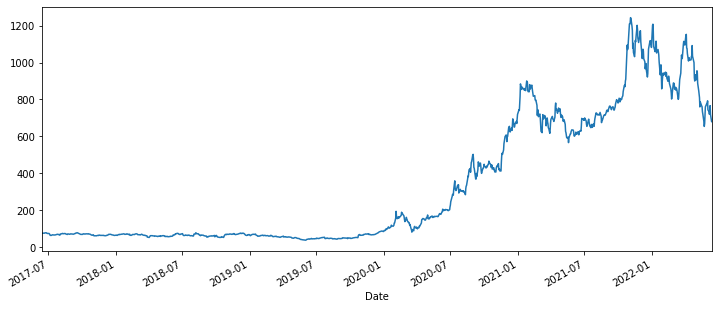

In [4]:
plt.figure(figsize=(12,5))
tesla['High'].plot()

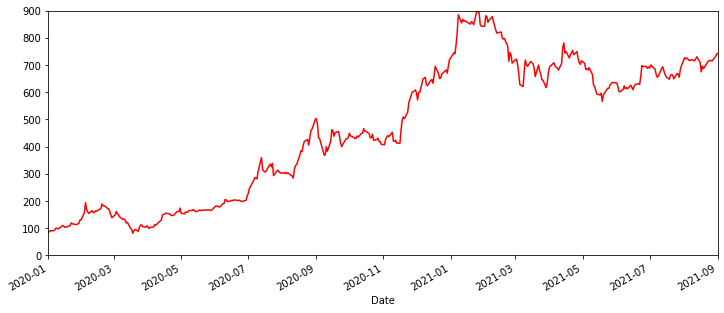

In [5]:
plt.figure(figsize=(12,5))
tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],c='r')

In [6]:
tesla.index

DatetimeIndex(['2017-06-15', '2017-06-16', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-26',
               '2017-06-27', '2017-06-28',
               ...
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06',
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [7]:
tesla.loc['2020-01-01':'2021-09-01']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-08-26,715.400024,697.619995,708.309998,701.159973,13214300.0,701.159973
2021-08-27,715.000000,702.099976,705.000000,711.919983,13833800.0,711.919983
2021-08-30,731.000000,712.729980,714.719971,730.909973,18604200.0,730.909973


In [8]:
index = tesla.loc['2020-01-01':'2021-09-01'] .index

In [9]:
share_open = tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [10]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

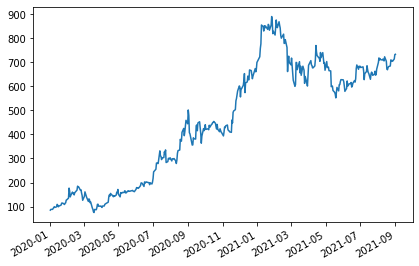

In [12]:
figure,axis=plt.subplots()
plt.tight_layout()
# preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [13]:
# Datetime index
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-06-15 to 2022-06-14
Data columns (total 6 columns):
High         1259 non-null float64
Low          1259 non-null float64
Open         1259 non-null float64
Close        1259 non-null float64
Volume       1259 non-null float64
Adj Close    1259 non-null float64
dtypes: float64(6)
memory usage: 100.9 KB


In [16]:
from datetime import datetime

In [17]:
datetime.now()

datetime.datetime(2022, 6, 15, 15, 40, 21, 882105)

Time Resampling

In [18]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-15,75.092003,73.297997,74.500000,75.068001,52132500.0,75.068001
2017-06-16,75.601997,74.019997,75.596001,74.279999,33655000.0,74.279999
2017-06-19,75.339996,73.559998,75.000000,73.959999,32746500.0,73.959999
2017-06-20,75.776001,73.945999,75.334000,74.447998,37193500.0,74.447998
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999


In [19]:
tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [20]:
tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


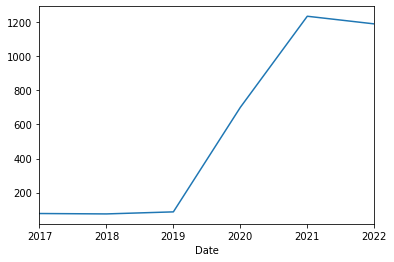

In [22]:
# rule A is for year and frequency
tesla.resample(rule='A').max()['Open'].plot()

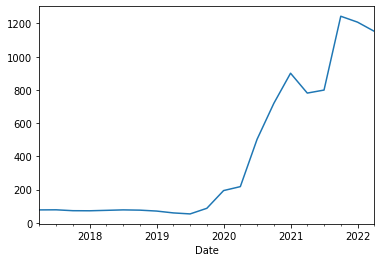

In [23]:
# quaterly start frequ
tesla.resample(rule='QS').max()['High'].plot()

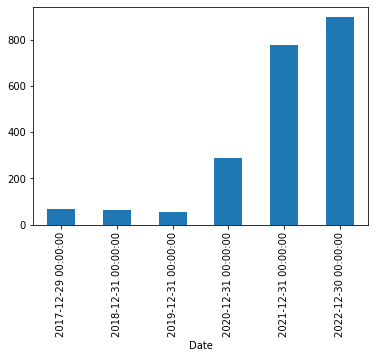

In [24]:
tesla['Open'].resample(rule='BA').mean().plot(kind='bar')

In [26]:
tesla['High'].rolling(10).mean().head(20)

Date
2017-06-15          NaN
2017-06-16          NaN
2017-06-19          NaN
2017-06-20          NaN
2017-06-21          NaN
2017-06-22          NaN
2017-06-23          NaN
2017-06-26          NaN
2017-06-27          NaN
2017-06-28    75.862400
2017-06-29    75.773199
2017-06-30    75.548399
2017-07-03    75.441399
2017-07-05    74.808599
2017-07-06    73.684599
2017-07-07    72.324599
2017-07-10    70.943599
2017-07-11    69.750199
2017-07-12    68.884199
2017-07-13    68.081399
Name: High, dtype: float64

In [27]:
tesla['Open:30 days rolling'] = tesla['Open'].rolling(30).mean()
tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-06-15,75.092003,73.297997,74.500000,75.068001,52132500.0,75.068001,NaN
2017-06-16,75.601997,74.019997,75.596001,74.279999,33655000.0,74.279999,NaN
2017-06-19,75.339996,73.559998,75.000000,73.959999,32746500.0,73.959999,NaN
2017-06-20,75.776001,73.945999,75.334000,74.447998,37193500.0,74.447998,NaN
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999,NaN
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003,NaN
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002,NaN
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001,NaN
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999,NaN


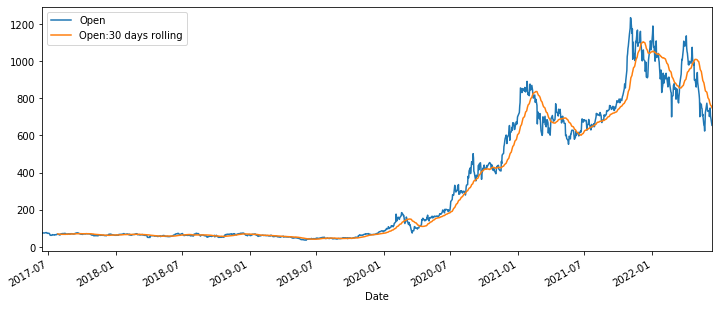

In [28]:
tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))